# Cleaning U.S. Census Data

## Goals
We want to investigate the census to compare the difference between the races, sexes, and incomes across the United States.

Some of the visualizations we plan to get:
1. Scatter plots that shows average income in a state VS proportion of women and men in that state
2. Histograms for the races that display frequency VS percentages
3. Pie chart to see if the data frame is equally presented for men VS women 
4. Pie chart to see the average percentage distribution of the races

## Challenges
1. Object types instead of numerical values created by default
2. Intrusive elements in the columns meant for numerical manipulation
3. Nan data and duplicates
4. Some columns are not required for this analysis

### Cleaning Data

In [57]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Upload all the csv files at once
files = glob.glob("states*.csv")

# Create an empty list for the files
states_list = []
# Loop through the files to get their data
for file in files:
    # Read the files with pandas
    data = pd.read_csv(file)
    # Append data to the list
    states_list.append(data)
# Concatenate the list into a data frame with pandas
us_census = pd.concat(states_list)

In [58]:
# Check the column names and dtypes to convert them into the right types for manipulation
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [59]:
# See a preview of the data frame to plan cleaning
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


In [70]:
# Loop through Income to clean the data values
for index in range(0, len(us_census["Income"])):
    # Make each value a string
    string = str(us_census["Income"].iat[index])
    # Remove a dollar sign by replacing
    replace_dol = string.replace("$", "")
    # Remove a comma by replacing
    replace_com = replace_dol.replace(",", "")
    # Perform replacement of each value in the column
    us_census["Income"].iat[index] = replace_com

# Turn the column into a format that is ready for conversion into a numerical type
us_census["Income"] = pd.to_numeric(us_census["Income"])

In [61]:
# See GenderPop to plan cleaning steps
us_census["GenderPop"].head()

# Create emply lists to separate the genders
Men = []
Women = []

# Loop through GenderPop to split the data values into two columns
for index in range(0, len(us_census["GenderPop"])):
    # Make each value a string
    string = str(us_census["GenderPop"].iat[index])
    # Split by underscore
    split = string.split("_")
    # Append to the appropriate lists 
    Men.append(split[0])
    Women.append(split[1])

# Update the columns with the new lists
us_census["Men"] = Men
us_census["Women"] = Women

# Check the results in a sample
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316M,13367298F


In [62]:
# Loop through Men to clean the data values
for index in range(0, len(us_census["Men"])):
    # Make each value a string
    string = str(us_census["Men"].iat[index])
    # Remove a letter by replacing
    replace_M = string.replace("M", "")
    # Perform replacement of each value in the column
    us_census["Men"].iat[index] = replace_M

# Loop through Women to clean the data values
for index in range(0, len(us_census["Women"])):
    # Make each value a string
    string = str(us_census["Women"].iat[index])
    # Remove a letter by replacing
    replace_F = string.replace("F", "")
    # Perform replacement of each value in the column
    us_census["Women"].iat[index] = replace_F

# Turn the columns into a format that is ready for conversion into a numerical type
us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])

# Check the results in a sample
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


In [63]:
# Fill in the nan values in Women
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])

# Check if there are duplicated values
us_census.duplicated(subset=us_census.columns[1:])
# Drop the duplicates by creating a new data frame
census = us_census.drop_duplicates(subset=us_census.columns[1:])

# Check the results in a sample
census.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


### Creating Scatter Plots

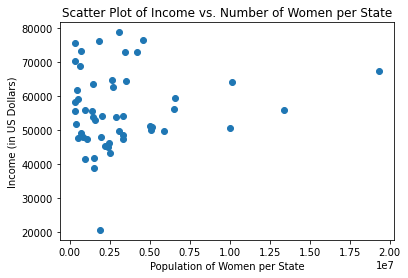

<Figure size 432x288 with 0 Axes>

In [64]:
# Create a scatter plot to display the difference between Income VS Number of Women per State
plt.scatter(census['Women'], census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
# Show the plot
plt.show()
plt.clf()


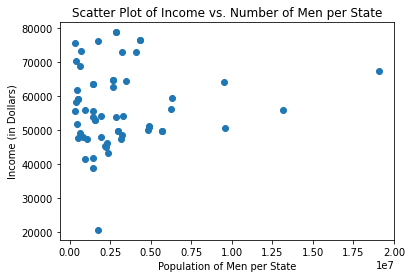

<Figure size 432x288 with 0 Axes>

In [65]:
# Create a scatter plot to display the difference between Income VS Number of Men per State
plt.scatter(us_census["Men"], us_census["Income"])
plt.title("Scatter Plot of Income vs. Number of Men per State")
plt.xlabel("Population of Men per State")
plt.ylabel("Income (in Dollars)")
# Show the plot
plt.show()
plt.clf()

### Creating Histograms

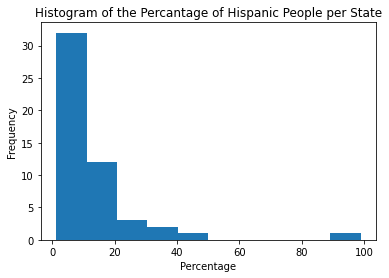

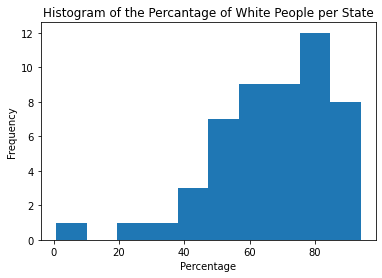

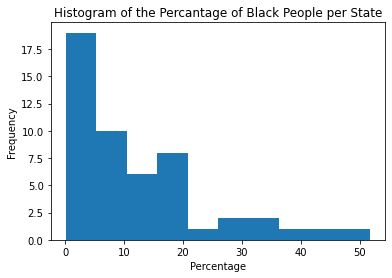

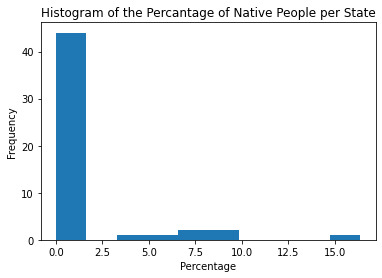

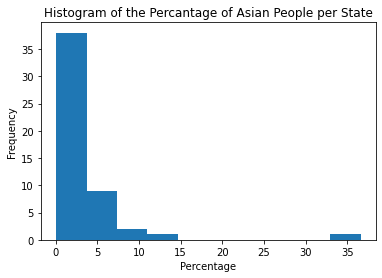

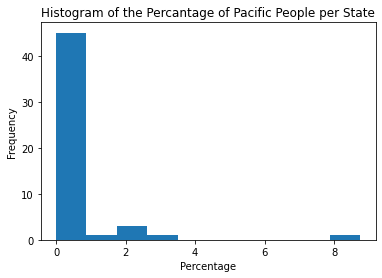

<Figure size 432x288 with 0 Axes>

In [66]:
# Loop through all the races to clean the data values
for race in ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]:
    # Loop through all the values in each race
    for index in range(0, len(us_census)):
        # Make each value a string
        string = str(us_census[race].iat[index])
        # Remove a persentage sign by replacing
        replace = string.replace("%", "")
        # Check for nan values and replace
        if (replace == "nan"):
            replace = ""
        # Perform replacement of each value in each column
        us_census[race].iat[index] = replace
    # Get the columns into the numerical format
    us_census[race] = pd.to_numeric(us_census[race])

# Fill in nan values for the Pacific column
us_census["Pacific"] = us_census["Pacific"].fillna(100 - us_census["Hispanic"] - us_census["White"] - us_census["Black"] - us_census["Native"] - us_census["Asian"])

# Drop the duplicates by updating a new data frame
census = us_census.drop_duplicates(subset=us_census.columns[1:])

# Loop through each race to create a separate histogram
for race in ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]:
    plt.hist(census[race])
    plt.title("Histogram of the Percantage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

### Creating Pie Charts

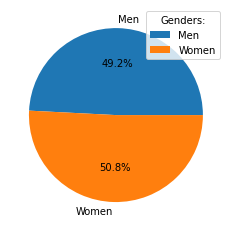

In [67]:
# Create an empty list for the pie chart values
men_vs_women = []
# Append data sets as sums of the gender columns
men_vs_women.append(census["Men"].sum())
men_vs_women.append(census["Women"].sum())

# Give proper labels 
labels = ["Men", "Women"]

# Create a pie chart with a legend
plt.pie(men_vs_women, labels=labels, autopct="%1.1f%%")
plt.legend(title="Genders:")
plt.show()


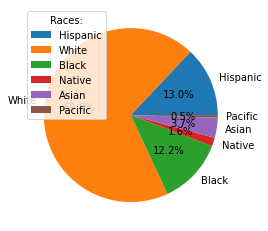

In [68]:
# Create an empty list for the pie chart values
races_list = []
# Append data sets as sums of the gender columns
races_list.append(census["Hispanic"].mean())
races_list.append(census["White"].mean())
races_list.append(census["Black"].mean())
races_list.append(census["Native"].mean())
races_list.append(census["Asian"].mean())
races_list.append(census["Pacific"].mean())

# Give proper labels
labels = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]

# Create a pie chart with a legend
plt.pie(races_list, labels=labels, autopct='%1.1f%%')
plt.legend(title="Races:")
plt.show()


In [69]:
# Drop the unnessary columns to get a clean overview of the data frame
clean_census = census.drop(["Unnamed: 0", "GenderPop"], axis="columns")
clean_census


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388,543273.0
1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409,2455167.0
2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477,419713.0
3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756,3331859.0
4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316,13367298.0
5,Utah,2903379,13.47,79.41,1.02,1.08,2.20,0.83,63488.92,1459229,1444150.0
1,Vermont,626604,1.61,93.98,0.98,0.30,1.24,0.03,55602.97,308573,318031.0
2,Virginia,8256630,8.01,63.27,20.18,0.21,5.46,0.06,72866.01,4060948,4195682.0
3,Washington,6985464,11.14,72.04,3.38,1.41,7.02,0.61,64493.77,3487725,3497739.0
4,West Virginia,1851420,1.29,92.18,3.66,0.15,0.68,0.03,41437.11,913631,937789.0
